In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier




In [2]:
# Load the training data
train_data = pd.read_csv("train.csv")
valid_data = pd.read_csv("valid.csv")
test_data = pd.read_csv("test.csv")

warnings.filterwarnings("ignore")

In [3]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6


In [4]:
valid_data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.029340,-0.026572,0.006227,-0.157240,-0.126458,-0.016806,0.011338,-0.051527,-0.051583,-0.027086,...,0.047600,-0.012270,0.043381,-0.022228,0.046098,0.049717,45,NaN,1,6
1,0.092717,0.067198,0.061320,-0.201336,-0.252250,0.006088,0.011854,-0.277564,0.029302,-0.034736,...,0.093419,0.139447,0.047001,-0.042325,0.031232,0.053672,45,NaN,1,6
2,-0.014250,0.072214,-0.053749,-0.016300,-0.142032,0.077692,0.121140,-0.098746,-0.009898,-0.006798,...,-0.023516,-0.063519,0.042752,-0.011081,0.161032,0.053349,45,NaN,1,6
3,-0.056856,0.014097,-0.029236,-0.150747,-0.078507,-0.040386,0.001480,-0.070090,0.025345,-0.039243,...,0.061066,-0.046192,0.059160,0.024137,0.062927,0.037316,45,NaN,1,6
4,-0.046353,0.054917,-0.081850,0.161505,0.054402,-0.138667,0.278676,-0.032590,-0.008799,-0.028483,...,-0.058222,0.012435,-0.009338,0.060546,0.056563,-0.178438,45,NaN,1,6


In [5]:
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.056358,0.110354,0.086118,-0.007819,-0.075472,-0.059300,0.070798,-0.248983,-0.089961,0.006400,...,-0.053337,0.100075,0.069232,-0.050435,0.015253,0.111465,45,NaN,1,6
1,0.107470,0.096578,0.080545,-0.018021,0.058663,-0.055802,0.151840,-0.009867,0.079329,0.064052,...,0.018714,0.056899,-0.004955,0.021818,-0.014656,-0.113502,45,NaN,1,6
2,-0.005145,0.032213,-0.023007,-0.181714,-0.074315,-0.023395,-0.020979,-0.124579,0.075221,0.036135,...,0.059032,-0.050108,0.012119,0.028469,0.101004,0.062354,45,NaN,1,6
3,0.046384,0.027612,0.048870,0.101007,-0.086649,-0.071455,0.081936,-0.057496,-0.071641,-0.057652,...,-0.065193,-0.080548,0.029042,0.082335,0.079904,0.028479,45,NaN,1,6
4,-0.064733,-0.029242,0.021288,-0.270739,-0.133085,-0.071396,-0.039286,0.079976,-0.032087,0.123837,...,-0.005609,0.021067,-0.018679,0.023730,-0.141079,0.043633,45,NaN,1,6


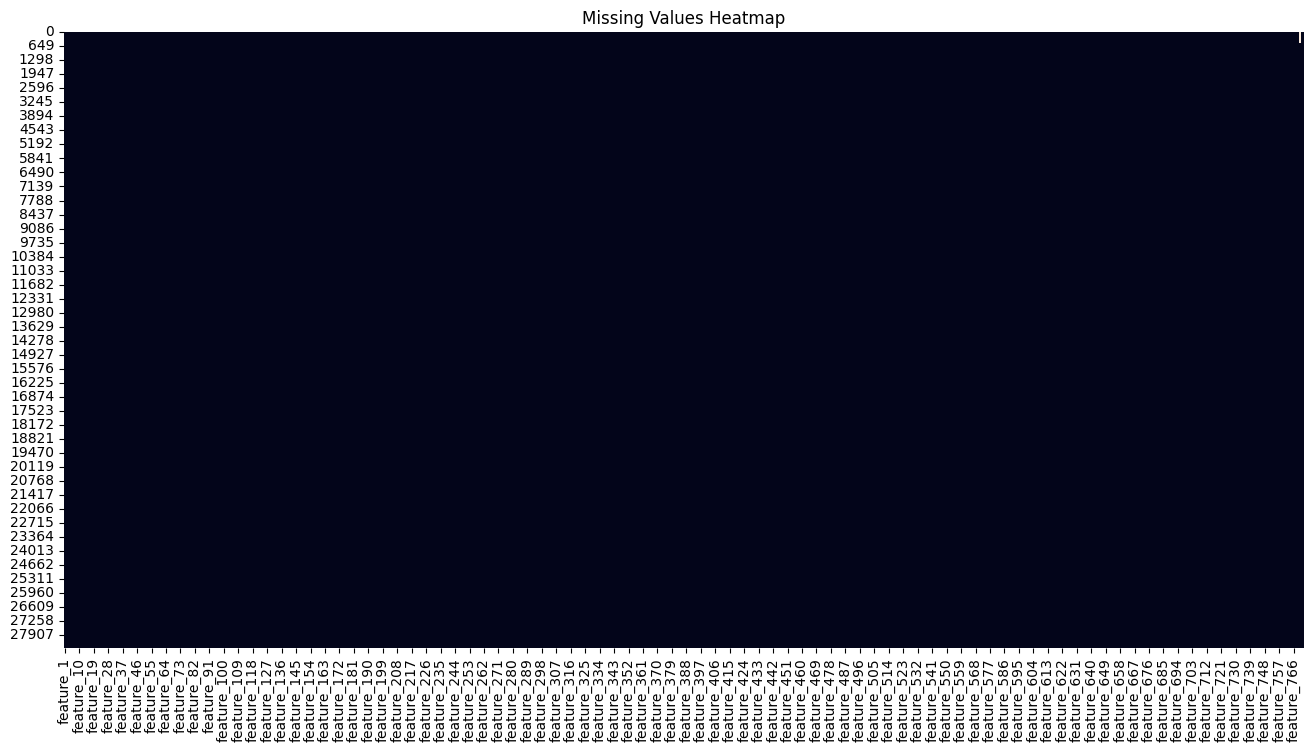

Column 'label_2': 480 missing values


In [6]:
train_data.head()
missing_matrix = train_data.isnull()
# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

missing_counts = train_data.isnull().sum()
for column, count in missing_counts.items():
    if(count>0):
      print(f"Column '{column}': {count} missing values")

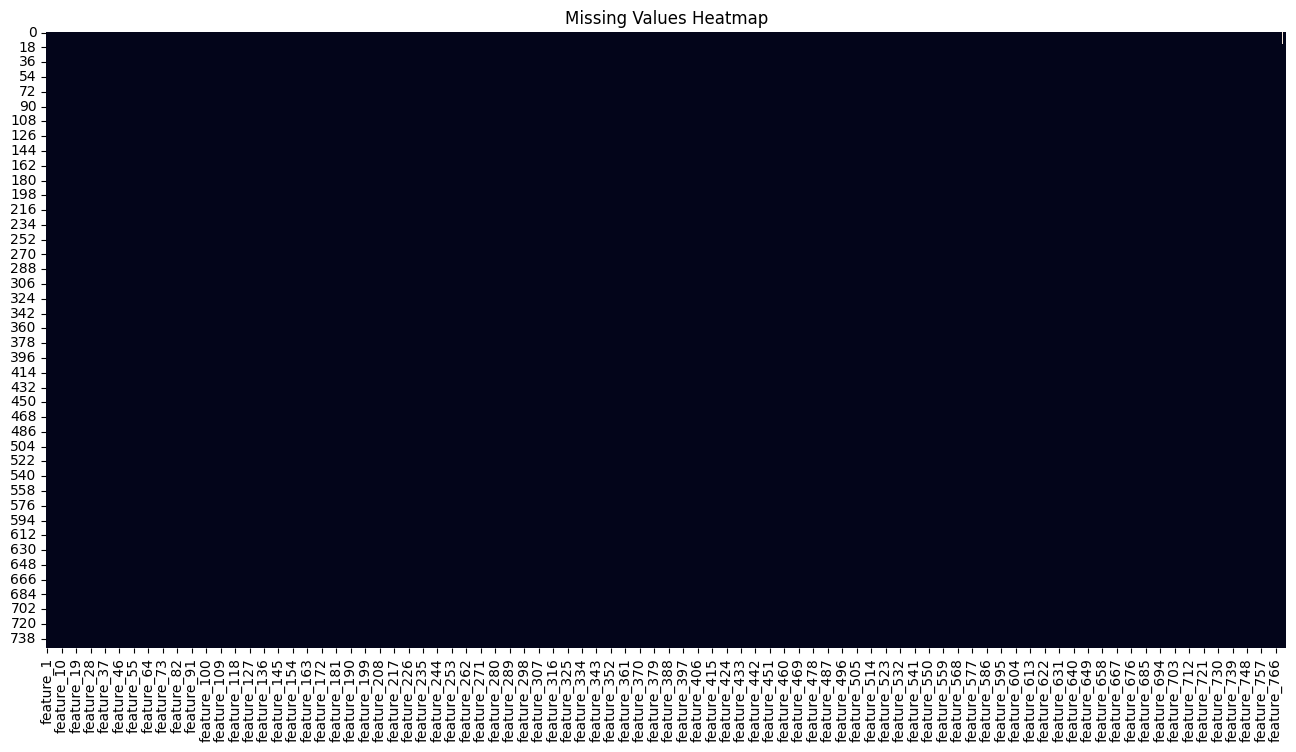

Column 'label_2': 14 missing values


In [7]:
valid_data.head()
missing_matrix = valid_data.isnull()
# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

missing_counts = valid_data.isnull().sum()
for column, count in missing_counts.items():
    if(count>0):
      print(f"Column '{column}': {count} missing values")

label_2 has missing values

In [18]:
# Separate features and labels
X_train = train_data.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_train = train_data[['label_1', 'label_2', 'label_3', 'label_4']]
X_valid = valid_data.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_valid = valid_data[['label_1', 'label_2', 'label_3', 'label_4']]
# X_test = test_data
X_test = test_data.drop(['ID'], axis=1)

In [19]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,-0.012747,0.065687,0.137501,-0.284607,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,-0.004775,0.021331,0.056852,-0.361596,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,-0.003266,0.057046,0.098336,-0.151976,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,-0.039695,0.041424,0.053399,0.004243,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028620,0.106456,0.054843,-0.202849,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945


In [20]:
Y_train.head()

,label_1,label_2,label_3,label_4
0,45,NaN,1,6
1,45,NaN,1,6
2,45,NaN,1,6
3,45,NaN,1,6
4,45,NaN,1,6


In [21]:
X_valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-0.029340,-0.026572,0.006227,-0.157240,-0.126458,-0.016806,0.011338,-0.051527,-0.051583,-0.027086,...,0.049800,0.081666,0.137374,0.017327,0.047600,-0.012270,0.043381,-0.022228,0.046098,0.049717
1,0.092717,0.067198,0.061320,-0.201336,-0.252250,0.006088,0.011854,-0.277564,0.029302,-0.034736,...,-0.089042,0.040419,0.132476,0.032387,0.093419,0.139447,0.047001,-0.042325,0.031232,0.053672
2,-0.014250,0.072214,-0.053749,-0.016300,-0.142032,0.077692,0.121140,-0.098746,-0.009898,-0.006798,...,-0.002316,0.054438,0.019233,-0.010703,-0.023516,-0.063519,0.042752,-0.011081,0.161032,0.053349
3,-0.056856,0.014097,-0.029236,-0.150747,-0.078507,-0.040386,0.001480,-0.070090,0.025345,-0.039243,...,-0.010141,0.066105,0.104175,-0.056275,0.061066,-0.046192,0.059160,0.024137,0.062927,0.037316
4,-0.046353,0.054917,-0.081850,0.161505,0.054402,-0.138667,0.278676,-0.032590,-0.008799,-0.028483,...,-0.140717,0.166548,0.144443,0.204932,-0.058222,0.012435,-0.009338,0.060546,0.056563,-0.178438


In [22]:
Y_valid.head()

,label_1,label_2,label_3,label_4
0,45,NaN,1,6
1,45,NaN,1,6
2,45,NaN,1,6
3,45,NaN,1,6
4,45,NaN,1,6


In [23]:
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.056358,0.110354,0.086118,-0.007819,-0.075472,-0.059300,0.070798,-0.248983,-0.089961,0.006400,...,-0.053337,0.100075,0.069232,-0.050435,0.015253,0.111465,45,NaN,1,6
1,0.107470,0.096578,0.080545,-0.018021,0.058663,-0.055802,0.151840,-0.009867,0.079329,0.064052,...,0.018714,0.056899,-0.004955,0.021818,-0.014656,-0.113502,45,NaN,1,6
2,-0.005145,0.032213,-0.023007,-0.181714,-0.074315,-0.023395,-0.020979,-0.124579,0.075221,0.036135,...,0.059032,-0.050108,0.012119,0.028469,0.101004,0.062354,45,NaN,1,6
3,0.046384,0.027612,0.048870,0.101007,-0.086649,-0.071455,0.081936,-0.057496,-0.071641,-0.057652,...,-0.065193,-0.080548,0.029042,0.082335,0.079904,0.028479,45,NaN,1,6
4,-0.064733,-0.029242,0.021288,-0.270739,-0.133085,-0.071396,-0.039286,0.079976,-0.032087,0.123837,...,-0.005609,0.021067,-0.018679,0.023730,-0.141079,0.043633,45,NaN,1,6


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [26]:
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

print(len(Y_train[L1].unique()))
print(len(Y_train[L2].unique()))
print(len(Y_train[L3].unique()))
print(len(Y_train[L4].unique()))

60
18
2
14


In [27]:
def model_accuracy_score(X_train_set, Y_train_set, X_valid_set, Y_valid_set, model):
    model.fit(X_train_set, Y_train_set)
    Y_predicted = model.predict(X_valid_set)
    return accuracy_score(Y_valid_set, Y_predicted)

In [28]:
def evaluate_models(models, X_train, y_train, X_valid, y_valid):
    model_accuracies = {
        model_name: model_accuracy_score(
            X_train, y_train, X_valid, y_valid, model)
        for model_name, model in models.items()
    }
    # Plot the accuracies
    plt.figure(figsize=(10, 6))
    plt.bar(model_accuracies.keys(), model_accuracies.values())
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    plt.show()

In [29]:
def hyperparameter_tuning(model, params, X_train_set, Y_train_set):
    # hyper parameter tuning
    model_cv = GridSearchCV(estimator=model, param_grid=params)
    model_cv.fit(X_train_set, Y_train_set)
    return model_cv.best_params_

## label_1

Text(0.5, 0, 'Speaker')

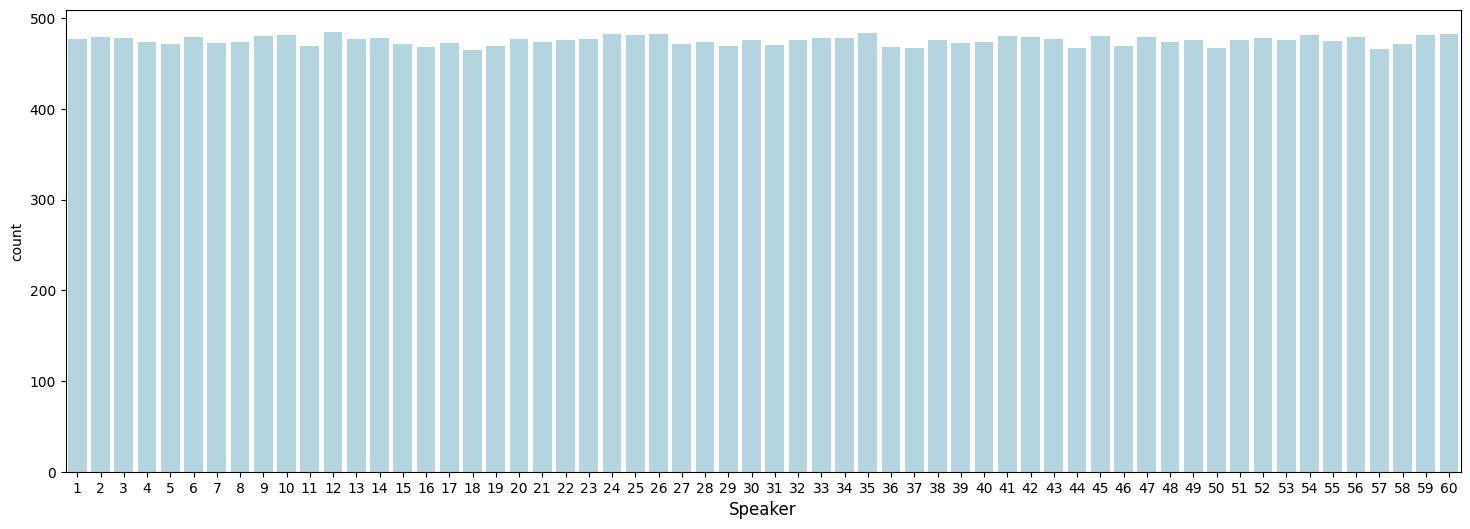

In [30]:
plt.figure(figsize=(18, 6))
sns.countplot(data=Y_train, x=L1, color='lightblue')
plt.xlabel('Speaker', fontsize=12)

In [31]:
scores_logistic = cross_val_score(LogisticRegression(), X_train, Y_train[L1], cv=3)

In [32]:
scores_logistic.mean()

0.9404278300832781

In [33]:
scores_svc = cross_val_score(SVC(C=1000, gamma=0.001), X_train, Y_train[L1], cv=3)

In [34]:
scores_svc.mean()

0.9386395744011007

In [35]:
scores_random_forest = cross_val_score(RandomForestClassifier(), X_train, Y_train[L1], cv=3)

In [36]:
scores_random_forest.mean()

0.8485273193489897

#### Logistic regression gives better accuracy

In [37]:
model_accuracy_score(
    X_train_scaled, Y_train[L1],
    X_valid_scaled, Y_valid[L1],
    LogisticRegression()
)

0.956

In [39]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca

array([[ 16.67835717,  -4.29069584,   4.79088467, ...,   0.30768358,
          0.13132323,  -0.01930073],
       [ -0.3368315 ,  -7.4101352 ,  -8.02987571, ...,  -0.7152919 ,
         -0.67614713,   0.30525544],
       [ -8.80829232, -12.09646915,   1.34787942, ...,   0.26694075,
         -0.04568956,   0.02285197],
       ...,
       [-12.89835774,  -2.08518271,  -8.0589539 , ...,  -0.28228792,
          0.53922234,  -0.88473968],
       [ 16.40597619,  -0.9171652 ,   4.57838023, ...,   0.39901764,
          0.34735806,   0.10223167],
       [-11.1334939 ,   1.89037413,  -8.76325454, ...,   0.57996248,
         -0.05592447,   0.10734103]])

In [42]:
models = {
    'SVM': SVC(C=1000, gamma=0.001),
    'LogisticRegression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
}

evaluate_models(models, X_train_pca, Y_train[L1], X_valid_pca, Y_valid[L1]) 


In [43]:
# Parametric tuning

param_grid = {'C': [100, 1000], 'gamma': [0.01, 0.001, 0.0001]}
best_params_svm_l1 = hyperparameter_tuning(
    SVC(), param_grid, X_train_pca, Y_train[L1])
print(best_params_svm_l1)

In [44]:
model_accuracy_score(
    X_train_pca, Y_train[L1],
    X_valid_pca,
    Y_valid[L1],
    SVC(C=100, gamma=0.001, kernel='rbf'),
)

In [ ]:
best_model_label_1 = SVC(C=100, gamma=0.001, kernel='rbf')

In [ ]:
predicted_label_1 = best_model_label_1.fit(X_train_pca, Y_train[L1]).predict(X_test_pca)

In [ ]:
predicted_label_1.shape

(744,)

## label_2

In [ ]:
train_data[L2].isnull().sum()

480

In [ ]:
label2_train_data = train_data.copy()
label2_valid_data = valid_data.copy()

In [ ]:
label2_train_data = label2_train_data.dropna(subset=[L2])
label2_valid_data = label2_valid_data.dropna(subset=[L2])

In [ ]:
label2_train_data[L2].isnull().sum()

0

In [ ]:
label2_train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
480,0.028968,0.086335,-0.008553,0.017904,-0.003091,0.049299,0.201684,-0.039836,-0.074652,-0.003109,...,-0.064608,-0.012367,-0.032077,0.026919,-0.082335,-0.107216,5,25.0,1,6
481,0.045295,-0.029367,-0.024587,-0.075212,-0.148834,0.001690,0.021042,-0.218901,0.082751,0.003598,...,-0.041954,-0.014579,0.063271,0.093091,0.017877,0.105377,5,25.0,1,6
482,0.064360,0.076325,0.008143,0.097886,-0.005449,-0.037119,0.182732,-0.158173,-0.060351,-0.052821,...,-0.108274,0.097193,-0.042421,0.061367,0.033348,-0.023222,5,25.0,1,6
483,0.043528,-0.014839,0.053809,-0.016741,-0.076868,-0.133831,0.175264,0.021426,0.010467,0.029441,...,-0.098615,0.071668,-0.127901,0.085099,0.031818,-0.068335,5,25.0,1,6
484,-0.068739,0.149956,0.015106,0.059950,-0.018913,0.048775,0.102219,-0.055106,0.005471,-0.050509,...,-0.044839,0.079562,0.035823,-0.009250,-0.010934,0.002891,5,25.0,1,6


In [ ]:
# Separate features and labels
X_train = label2_train_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_train = label2_train_data[['label_1', 'label_2', 'label_3', 'label_4']]
X_valid = label2_valid_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_valid = label2_valid_data[['label_1', 'label_2', 'label_3', 'label_4']]
# X_test = test_data
X_test = test_data.drop(['ID'], axis=1)

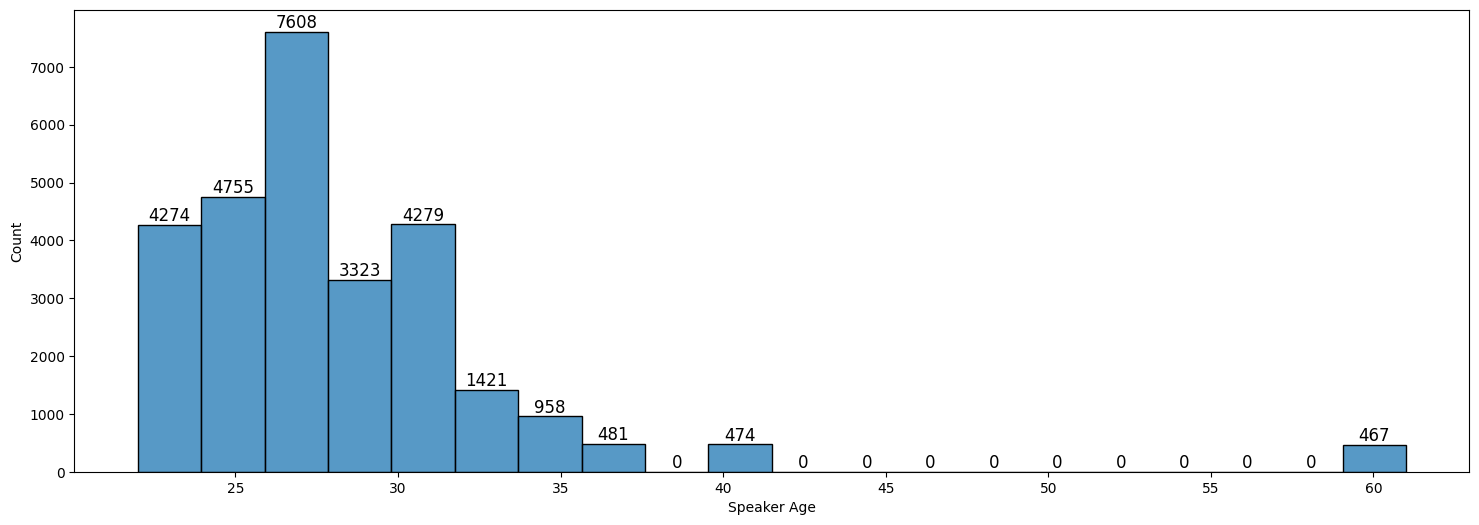

In [ ]:
# Visualize data

plt.figure(figsize=(18, 6))
ax = sns.histplot(data=Y_train, x='label_2', bins=20, kde=False)
plt.xlabel('Speaker Age')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
Y_train[L2].nunique()

17

In [ ]:
Y_train[L2].value_counts()

label_2
26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: count, dtype: int64

In [ ]:
X_train.shape

(28040, 768)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
model_accuracy_score(
    X_train_pca, Y_train[L2],
    X_valid_pca, Y_valid[L2],
    KNeighborsClassifier(n_neighbors=11),
)

0.8383152173913043

In [ ]:
model_accuracy_score(
    X_train_pca, Y_train[L2],
    X_valid_pca, Y_valid[L2],
    SVC(C=1000),
)

0.9293478260869565

0:	learn: 2.7131054	total: 210ms	remaining: 3m 30s
1:	learn: 2.6257317	total: 358ms	remaining: 2m 58s
2:	learn: 2.5588100	total: 511ms	remaining: 2m 49s
3:	learn: 2.5060088	total: 657ms	remaining: 2m 43s
4:	learn: 2.4501748	total: 812ms	remaining: 2m 41s
5:	learn: 2.4146481	total: 956ms	remaining: 2m 38s
6:	learn: 2.3667666	total: 1.1s	remaining: 2m 36s
7:	learn: 2.3321591	total: 1.25s	remaining: 2m 35s
8:	learn: 2.2912146	total: 1.4s	remaining: 2m 34s
9:	learn: 2.2597341	total: 1.55s	remaining: 2m 33s
10:	learn: 2.2318690	total: 1.7s	remaining: 2m 32s
11:	learn: 2.2000078	total: 1.85s	remaining: 2m 32s
12:	learn: 2.1803143	total: 1.99s	remaining: 2m 31s
13:	learn: 2.1579447	total: 2.14s	remaining: 2m 30s
14:	learn: 2.1330540	total: 2.29s	remaining: 2m 30s
15:	learn: 2.1147931	total: 2.44s	remaining: 2m 29s
16:	learn: 2.0956020	total: 2.59s	remaining: 2m 29s
17:	learn: 2.0800910	total: 2.74s	remaining: 2m 29s
18:	learn: 2.0599263	total: 2.89s	remaining: 2m 29s
19:	learn: 2.0378649	tota

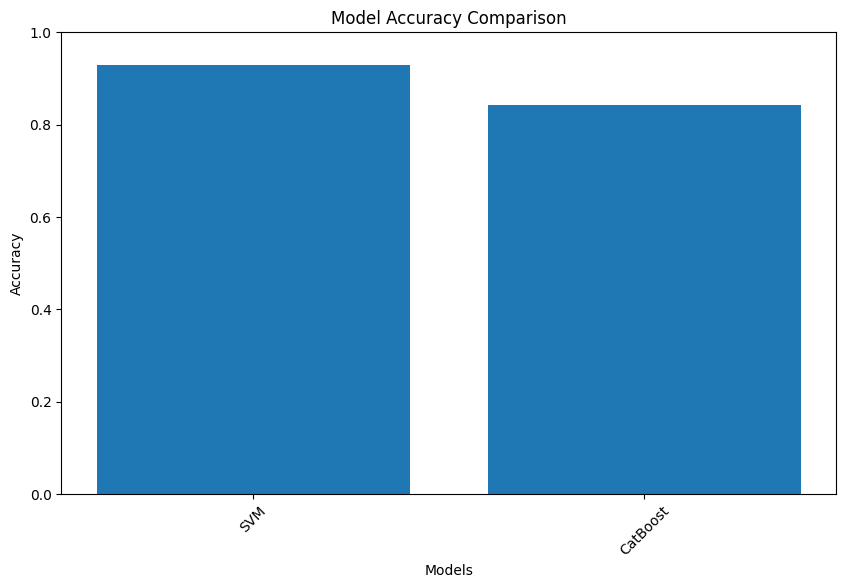

In [ ]:
models = {
    'SVM': SVC(C=1000),
    'CatBoost': CatBoostClassifier(loss_function='MultiClass', learning_rate=0.15)
}

evaluate_models(models, X_train_pca, Y_train[L2], X_valid_pca, Y_valid[L2])

In [ ]:
best_model_label_2 = SVC(C=1000)
predicted_label_2 = best_model_label_2.fit(X_train_pca, Y_train[L2]).predict(X_test_pca)

## label_3

In [ ]:
# Separate features and labels
X_train = train_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_train = train_data[['label_1', 'label_2', 'label_3', 'label_4']]
X_valid = valid_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_valid = valid_data[['label_1', 'label_2', 'label_3', 'label_4']]
# X_test = test_data
X_test = test_data.drop(['ID'], axis=1)

Text(0.5, 0, 'Speaker Gender')

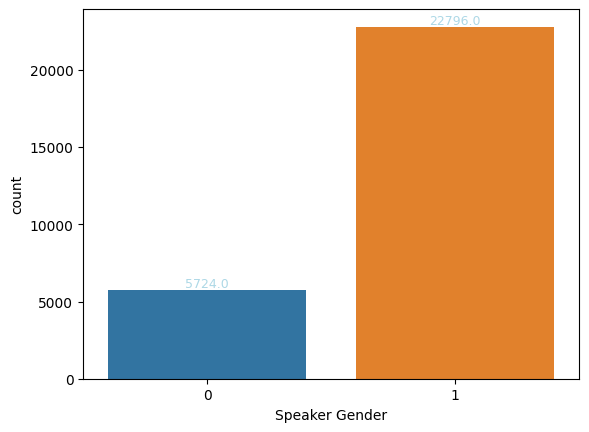

In [ ]:
ax = sns.countplot(x=Y_train[L3])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='lightblue')
    
plt.xlabel('Speaker Gender')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
model_accuracy_score(
    X_train_pca, Y_train[L3],
    X_valid_pca,
    Y_valid[L3],
    SVC(),
)

0.9986666666666667

In [ ]:
cross_val_score(SVC(), X_train_pca, Y_train[L3], cv=5).mean()

0.9844319775596073

In [ ]:
predicted_label_3 = SVC().fit(X_train_pca, Y_train[L3]).predict(X_test_pca)

## label_4

In [ ]:
# Separate features and labels
X_train = train_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_train = train_data[['label_1', 'label_2', 'label_3', 'label_4']]
X_valid = valid_data.drop(
    ['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
Y_valid = valid_data[['label_1', 'label_2', 'label_3', 'label_4']]
# X_test = test_data
X_test = test_data.drop(['ID'], axis=1)

Text(0.5, 0, 'Speaker Accent')

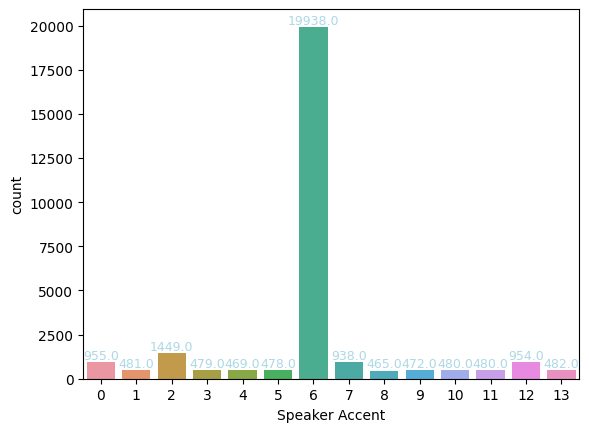

In [ ]:
ax = sns.countplot(x=y_train[L4])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='lightblue')
    
plt.xlabel('Speaker Accent')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
model_accuracy_score(
    X_train_pca, Y_train[L4],
    X_valid_pca,
    Y_valid[L4],
    SVC(class_weight='balanced', C=1000),
)

0.9653333333333334

In [ ]:
cross_val_score(SVC(class_weight='balanced', C=1000), X_train_pca, Y_train[L4], cv=5, scoring='accuracy').mean()

0.9298737727910238

In [ ]:
predicted_label_4 = SVC(class_weight='balanced', C=1000).fit(X_train_pca, Y_train[L4]).predict(X_test_pca)

## Generating Output

In [ ]:
output_df = test_data[['ID']]
output_df['label_1'] = predicted_label_1
output_df['label_2'] = predicted_label_2
output_df['label_3'] = predicted_label_3
output_df['label_4'] = predicted_label_4

In [ ]:
output_df.head()

,ID,label_1,label_2,label_3,label_4
0,1,26,22.0,0,2
1,2,18,25.0,1,8
2,3,16,30.0,1,6
3,4,7,27.0,1,6
4,5,58,29.0,0,6


In [ ]:
output_df.to_csv('190137J_output_layer8.csv', index=False)